In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Let's import the citipy script and practice using it (don't need .py on script name)

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cabo san lucas mx
saint george bm
taolanaro mg
taolanaro mg
new norfolk au
vaitupu wf
palmer us
bluff nz
shimoda jp
tidore id
ampanihy mg
jamestown sh
khonuu ru
yellowknife ca
soyo ao
adamas gr
victoria sc
lagoa pt
burica pa
shelburne ca
hermanus za
port augusta au
lebu cl
virginia beach us
esterhazy ca
djambala cg
albany au
barrow us
punta arenas cl
sentyabrskiy ru
qaanaaq gl
albany au
poum nc
nizhneyansk ru
port elizabeth za
son la vn
taolanaro mg
safaga eg
sambava mg
klaksvik fo
pevek ru
kisanga tz
bedele et
bathsheba bb
mataura pf
saratoga springs us
guatire ve
georgetown sh
yellowknife ca
mataura pf
wamba cd
cape town za
yulara au
marcona pe
vaini to
padang id
kapaa us
doume cm
carnarvon au
butaritari ki
airai pw
abu dhabi ae
vaini to
vaini to
mataura pf
busselton au
quilali ni
rikitea pf
punta arenas cl
mataura pf
bredasdorp za
taolanaro mg
busselton au
alofi nu
bethel us
vaini to
half moon bay us
mys shmidta ru
norman wells ca
ushuaia ar
monitos co
barentsburg sj
san cristobal e

cape town za
fortuna us
krasnogorsk ru
dikson ru
belushya guba ru
ushuaia ar
kalabo zm
mataura pf
cabo san lucas mx
gayny ru
slave lake ca
sidi ali dz
darhan mn
iqaluit ca
cabatuan ph
atuona pf
ushuaia ar
albany au
chokurdakh ru
east london za
chumikan ru
norman wells ca
kapaa us
shubarkuduk kz
indramayu id
airai pw
lolua tv
hobart au
vaini to
atuona pf
fortuna us
yumen cn
nautla mx
bethel us
ambilobe mg
scottsburgh za
avarua ck
giporlos ph
richards bay za
belushya guba ru
pinega ru
poum nc
batagay-alyta ru
takob tj
bengkulu id
nikolskoye ru
butaritari ki
atuona pf
tuktoyaktuk ca
tukrah ly
illoqqortoormiut gl
geraldton au
kirakira sb
tasiilaq gl
butaritari ki
port hardy ca
port alfred za
port-de-paix ht
bluff nz
bengkulu id
rikitea pf
banda aceh id
cherskiy ru
mount gambier au
ribeira grande pt
harseni ro
provideniya ru
tarauaca br
hofn is
port elizabeth za
bluff nz
bluff nz
hithadhoo mv
bredasdorp za
belushya guba ru
new norfolk au
shirokiy ru
elat il
ambon id
marcona pe
saint george 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create a set of random lat and long combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# att the lats/longs to a list 
coordinates = list(lat_lngs)

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
import time
from datetime import datetime

In [12]:
# The above does the following:
# 1. Create cities list
# 2. Iterate thru coordinates and retrieve nearest city using lat/lon pair
# 3. Add decisison statement with logical operator 'not in'
    # to determine if city is already in list... if not, append. 
    
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | palmer
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | shimoda
Processing Record 9 of Set 1 | tidore
City not found. Skipping...
Processing Record 10 of Set 1 | ampanihy
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | khonuu
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | soyo
Processing Record 15 of Set 1 | adamas
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | burica
City not found. Skipping...
Processing Record 19 of Set 1 | shelburne
Processing Record 20 of Set 1 | h

Processing Record 34 of Set 4 | khilok
Processing Record 35 of Set 4 | wanaka
Processing Record 36 of Set 4 | port moresby
Processing Record 37 of Set 4 | provideniya
Processing Record 38 of Set 4 | kinablangan
Processing Record 39 of Set 4 | roebourne
Processing Record 40 of Set 4 | muleba
Processing Record 41 of Set 4 | cedar city
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | samut sakhon
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | ugoofaaru
Processing Record 48 of Set 4 | mongo
Processing Record 49 of Set 4 | tezu
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | opuwo
Processing Record 2 of Set 5 | miramar
Processing Record 3 of Set 5 | gambela
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | halalo
City not found. Skipping...
Processing Record 6 of Set 5 | pringse

Processing Record 23 of Set 8 | los llanos de aridane
Processing Record 24 of Set 8 | santarem
Processing Record 25 of Set 8 | hisor
Processing Record 26 of Set 8 | kavaratti
Processing Record 27 of Set 8 | vila velha
Processing Record 28 of Set 8 | srednekolymsk
Processing Record 29 of Set 8 | kieta
Processing Record 30 of Set 8 | arraial do cabo
Processing Record 31 of Set 8 | tara
Processing Record 32 of Set 8 | road town
Processing Record 33 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 34 of Set 8 | boende
Processing Record 35 of Set 8 | mayumba
Processing Record 36 of Set 8 | sept-iles
Processing Record 37 of Set 8 | ambulu
Processing Record 38 of Set 8 | sydney
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | pitsunda
Processing Record 41 of Set 8 | zima
Processing Record 42 of Set 8 | porto novo
Processing Record 43 of Set 8 | mersing
Processing Record 44 of Set 8 | hasaki
Processing Record 45 of Set 8 | romny
Processing Record 46 of 

Processing Record 11 of Set 12 | laurel
Processing Record 12 of Set 12 | mgachi
Processing Record 13 of Set 12 | upata
Processing Record 14 of Set 12 | rochegda
Processing Record 15 of Set 12 | kargasok
Processing Record 16 of Set 12 | sao felix do xingu
Processing Record 17 of Set 12 | oktyabrskoye
Processing Record 18 of Set 12 | bonoua
Processing Record 19 of Set 12 | kampot
Processing Record 20 of Set 12 | dzaoudzi
Processing Record 21 of Set 12 | hatillo
Processing Record 22 of Set 12 | harper
Processing Record 23 of Set 12 | deputatskiy
Processing Record 24 of Set 12 | kirovsk
Processing Record 25 of Set 12 | pirgos
Processing Record 26 of Set 12 | byron bay
Processing Record 27 of Set 12 | bolshaya rechka
Processing Record 28 of Set 12 | beatrice
Processing Record 29 of Set 12 | sento se
City not found. Skipping...
Processing Record 30 of Set 12 | buta
Processing Record 31 of Set 12 | polyarnyy
Processing Record 32 of Set 12 | ellensburg
Processing Record 33 of Set 12 | venice
P

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,75.61,59,0,3.00,MX,2022-02-05 19:28:54
1,Saint George,37.1041,-113.5841,54.07,23,0,3.00,US,2022-02-05 19:30:15
2,New Norfolk,-42.7826,147.0587,56.71,67,100,1.68,AU,2022-02-05 19:30:15
3,Palmer,42.1584,-72.3287,25.59,55,20,3.00,US,2022-02-05 19:20:51
4,Bluff,-46.6000,168.3333,51.80,71,72,13.67,NZ,2022-02-05 19:30:16
5,Shimoda,34.6667,138.9500,33.10,64,11,25.03,JP,2022-02-05 19:30:16
6,Ampanihy,-24.7000,44.7500,75.22,82,100,18.79,MG,2022-02-05 19:30:09
7,Jamestown,42.0970,-79.2353,22.30,45,40,3.00,US,2022-02-05 19:30:17
8,Yellowknife,62.4560,-114.3525,-9.58,89,75,6.91,CA,2022-02-05 19:28:31
9,Soyo,-6.1349,12.3689,78.17,84,87,9.01,AO,2022-02-05 19:30:17


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644100284.9493995

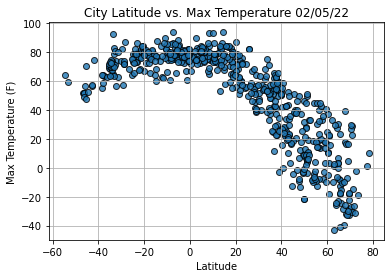

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

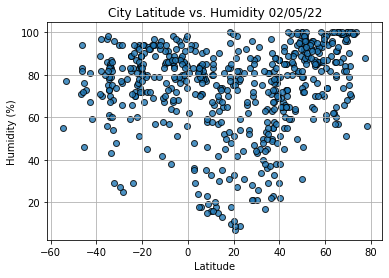

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

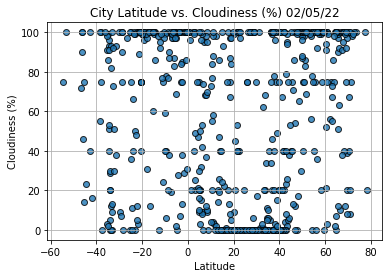

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

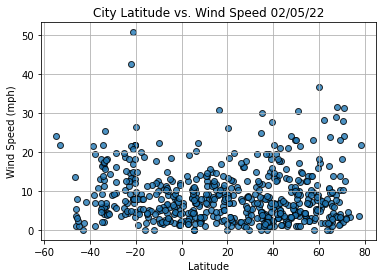

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()